In [1]:
from google.colab import drive
drive.mount("/content/drive")
import shutil
from google.colab import files

Mounted at /content/drive


In [2]:
import cv2
import math
import os
import numpy as np
import pandas as pd
from numpy.ma.core import ceil
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
import matplotlib.colors as colors
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, GlobalMaxPooling2D, Dense, Flatten, Dropout, MaxPooling2D, LSTM, Lambda, Conv1D, GlobalMaxPooling1D
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import to_categorical



In [3]:
data_path = "/content/drive/MyDrive/Location_Season_Data/"

In [4]:
train_df = pd.read_csv(data_path + "Location_Season_Wind_Pressure_first_3_year_ROI.csv")
train_df

,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,season,Name,Day,Class
0,0.475692,0.459692,0.473846,0.454769,0.471385,0.449846,0.468923,0.444923,0.465846,0.440000,...,0.448598,0.376324,1,1,1,0,2,116_c7_cp2_100_32,116,0
1,0.464615,0.488000,0.463385,0.491692,0.462769,0.494769,0.460923,0.498462,0.460308,0.502769,...,0.480997,0.514019,1,0,1,0,2,125_c3_cp2_49_32,125,0
2,0.248615,0.569231,0.243692,0.564923,0.240000,0.560615,0.237538,0.556923,0.235692,0.553231,...,0.267912,0.554517,1,0,0,0,2,120_c1_cp2_31_29,120,0
3,0.552000,0.515077,0.544000,0.517538,0.536615,0.519385,0.529846,0.521846,0.524923,0.523692,...,0.499065,0.442368,1,1,1,0,2,127_c3_cp3_96_38,127,0
4,0.248615,0.552000,0.243692,0.544000,0.240000,0.536615,0.237538,0.529846,0.235692,0.524923,...,0.267912,0.499065,1,0,0,0,2,120_c2_cp2_31_29,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.930833,0.396694,0.935248,0.409836,0.939601,0.426230,0.937135,0.433333,0.942242,0.434426,...,0.953185,0.365079,1,0,1,1,3,997_c12_cp2_62_59,997,3
1064,0.869459,0.438017,0.873418,0.459016,0.876279,0.475410,0.877193,0.483333,0.879589,0.483607,...,0.919884,0.682540,1,0,1,1,3,998_c12_cp2_37_48,998,2
1065,0.759864,0.404959,0.772639,0.418033,0.783731,0.434426,0.791910,0.433333,0.800783,0.418033,...,0.813224,0.142857,1,1,1,0,3,999_c11_cp2_102_34,999,2
1066,0.812957,0.338843,0.820837,0.336066,0.826595,0.319672,0.829435,0.300000,0.835047,0.278689,...,0.921332,0.706349,1,0,1,0,3,999_c11_cp3_37_44,999,2


In [5]:
all_df = pd.read_csv(data_path + "Location_Season_Pressure_Wind_Merging_ROI.csv")
all_df

,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,season,Name,Day
0,0.904043,0.314050,0.904576,0.327869,0.904043,0.344262,0.900097,0.341667,0.896721,0.344262,...,0.281250,0.925676,0.285714,1,0,0,1,2,3449_c9_cp2_29_58,3449
1,0.854847,0.471074,0.857352,0.475410,0.859717,0.483607,0.859649,0.491667,0.861968,0.483607,...,0.312500,0.874035,0.317460,1,1,1,1,2,3450_c8_cp2_98_50,3450
2,0.886995,0.305785,0.881207,0.311475,0.876766,0.327869,0.872807,0.333333,0.872736,0.336066,...,0.304688,0.926641,0.301587,1,0,1,1,2,3450_c8_cp3_59_56,3450
3,0.861179,0.454545,0.864167,0.475410,0.866050,0.500000,0.867446,0.508333,0.871268,0.516393,...,0.328125,0.889479,0.333333,1,1,1,1,2,3451_c8_cp2_99_50,3451
4,0.915246,0.247934,0.914800,0.270492,0.915246,0.295082,0.915205,0.316667,0.919236,0.327869,...,0.296875,0.952220,0.293651,1,0,1,1,2,3452_c8_cp3_55_59,3452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,0.672187,0.355372,0.668452,0.360656,0.665855,0.377049,0.662768,0.375000,0.662261,0.377049,...,0.562500,0.747587,0.555556,1,0,0,0,3,1648_c3_cp2_15_28,1648
3648,0.950804,0.404959,0.950341,0.418033,0.953726,0.434426,0.954191,0.441667,0.957416,0.442623,...,0.273438,0.946911,0.261905,1,0,1,1,3,1648_c9_cp3_65_62,1648
3649,0.918169,0.471074,0.925998,0.500000,0.932294,0.532787,0.938596,0.550000,0.945179,0.549180,...,0.437500,0.937741,0.428571,1,0,1,1,3,1649_c11_cp1_61_51,1649
3650,0.621042,0.264463,0.622201,0.270492,0.623965,0.286885,0.625731,0.291667,0.628977,0.295082,...,0.546875,0.707529,0.523810,1,0,0,0,3,1649_c3_cp2_16_25,1649


In [6]:
test_df = all_df[(all_df["Day"] >= 1096) & (all_df["Day"] <= 1825)]
test_df["ROI"] = test_df["Name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[3] + "_" + x.split("_")[4])
test_df = test_df.drop_duplicates(subset = "ROI")
test_df = test_df.sort_values(by = "Name")
test_df.reset_index(drop = True, inplace = True)
test_df

<ipython-input-6-eeb1e0cc003e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["ROI"] = test_df["Name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[3] + "_" + x.split("_")[4])


,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,season,Name,Day,ROI
0,0.332684,0.760331,0.333496,0.762295,0.334632,0.762295,0.336745,0.750000,0.339697,0.721311,...,0.433398,0.761905,1,0,1,0,1,1099_c8_cp2_53_25,1099,1099_53_25
1,0.148076,0.322314,0.148004,0.344262,0.148563,0.368852,0.148635,0.391667,0.148801,0.409836,...,0.075290,0.500000,0,1,1,0,1,1106_c2_cp2_100_11,1106,1106_100_11
2,0.550901,0.280992,0.551120,0.295082,0.550414,0.311475,0.549220,0.325000,0.549682,0.344262,...,0.653475,0.261905,1,0,1,0,1,1111_c10_cp2_53_37,1111,1111_53_37
3,0.077935,0.305785,0.074489,0.319672,0.071603,0.344262,0.068713,0.358333,0.066079,0.368852,...,0.118726,0.396825,0,0,1,0,1,1121_c1_cp1_72_15,1121,1121_72_15
4,0.087189,0.413223,0.083252,0.434426,0.078909,0.467213,0.074561,0.483333,0.070485,0.491803,...,0.076737,0.587302,0,1,1,0,1,1123_c1_cp1_76_16,1123,1123_76_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.177789,0.421488,0.176241,0.418033,0.175353,0.418033,0.173489,0.408333,0.172296,0.401639,...,0.225869,0.595238,0,0,1,0,4,1815_c1_cp1_71_15,1815,1815_71_15
675,0.145153,0.603306,0.142648,0.598361,0.140283,0.590164,0.137914,0.583333,0.134606,0.565574,...,0.152510,0.753968,0,0,1,0,4,1816_c1_cp1_69_19,1816,1816_69_19
676,0.143205,0.586777,0.144109,0.590164,0.145641,0.590164,0.146686,0.583333,0.148311,0.573770,...,0.169884,0.912698,0,1,1,0,4,1817_c1_cp1_82_23,1817,1817_82_23
677,0.191914,0.454545,0.188413,0.450820,0.185095,0.459016,0.182261,0.450000,0.180127,0.442623,...,0.168919,0.920635,0,1,1,0,4,1818_c1_cp1_89_22,1818,1818_89_22


In [7]:
X_train = train_df.drop(columns = ["450", "451", "452", "453", "season", "Name", "Day", "Class"])
Y_train = train_df["Class"]

X_test = test_df.drop(columns = ["450", "451", "452", "453", "season", "Name", "Day", "ROI"])

# **SOM**

In [8]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled
#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [9]:
num_rows = 33
num_cols = 33
max_m_dsitance = 7
max_learning_rate = 0.75
max_steps = 150000

In [10]:
#main function

train_x_norm = minmax_scaler(X_train) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
#np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [11]:
label_data = np.array(Y_train)
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000


In [12]:
map_table = {}
for i in range(len(map)):
    for j in range(len(map[0])):
        if len(map[i][j]) == 0:
            map_table[i, j] = [None]
        else:
            hash_table = {}
            for k in map[i][j]:
                if k in hash_table:
                    hash_table[k] += 1
                else:
                    hash_table[k] = 1
            for key, value in hash_table.items():
                percentage = [key, round((value / len(map[i][j])), 2)]
                if (i, j) not in map_table:
                    map_table[i, j] = []
                map_table[i, j].append(percentage)


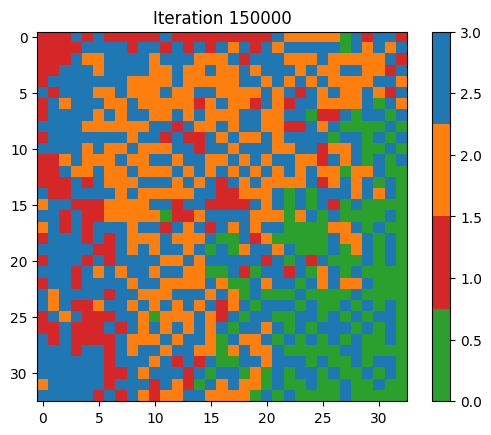

In [13]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 3
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:blue'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [14]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data_frame = minmax_scaler(X_test) # normalisation

winner_labels = []
pre_labels = []

for t in range(data_frame.shape[0]):
  winner = winning_neuron(data_frame, t, som, num_rows, num_cols)
  row = winner[0]
  col = winner[1]
  pred = map_table[row, col]
  predicted = label_map[row][col]
  pre_labels.append(pred)
  winner_labels.append(predicted)

In [15]:
SOM_test_df = test_df.copy()
SOM_test_df["Class"] = winner_labels
SOM_test_df["Percentage"] = pre_labels

# Assuming your DataFrame is named "SOM_test_df"
SOM_test_df['Percentage'] = SOM_test_df['Percentage'].apply(lambda x: [] if x == [None] else x)

# Print the updated DataFrame
SOM_test_df

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,season,Name,Day,ROI,Class,Percentage
0,0.332684,0.760331,0.333496,0.762295,0.334632,0.762295,0.336745,0.750000,0.339697,0.721311,...,1,0,1,0,1,1099_c8_cp2_53_25,1099,1099_53_25,0,"[[0, 0.5], [2, 0.5]]"
1,0.148076,0.322314,0.148004,0.344262,0.148563,0.368852,0.148635,0.391667,0.148801,0.409836,...,0,1,1,0,1,1106_c2_cp2_100_11,1106,1106_100_11,3,[]
2,0.550901,0.280992,0.551120,0.295082,0.550414,0.311475,0.549220,0.325000,0.549682,0.344262,...,1,0,1,0,1,1111_c10_cp2_53_37,1111,1111_53_37,0,"[[0, 1.0]]"
3,0.077935,0.305785,0.074489,0.319672,0.071603,0.344262,0.068713,0.358333,0.066079,0.368852,...,0,0,1,0,1,1121_c1_cp1_72_15,1121,1121_72_15,0,"[[0, 1.0]]"
4,0.087189,0.413223,0.083252,0.434426,0.078909,0.467213,0.074561,0.483333,0.070485,0.491803,...,0,1,1,0,1,1123_c1_cp1_76_16,1123,1123_76_16,0,"[[0, 1.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.177789,0.421488,0.176241,0.418033,0.175353,0.418033,0.173489,0.408333,0.172296,0.401639,...,0,0,1,0,4,1815_c1_cp1_71_15,1815,1815_71_15,0,"[[0, 1.0]]"
675,0.145153,0.603306,0.142648,0.598361,0.140283,0.590164,0.137914,0.583333,0.134606,0.565574,...,0,0,1,0,4,1816_c1_cp1_69_19,1816,1816_69_19,0,"[[0, 1.0]]"
676,0.143205,0.586777,0.144109,0.590164,0.145641,0.590164,0.146686,0.583333,0.148311,0.573770,...,0,1,1,0,4,1817_c1_cp1_82_23,1817,1817_82_23,0,"[[0, 1.0]]"
677,0.191914,0.454545,0.188413,0.450820,0.185095,0.459016,0.182261,0.450000,0.180127,0.442623,...,0,1,1,0,4,1818_c1_cp1_89_22,1818,1818_89_22,0,"[[0, 1.0]]"


In [16]:
def calculate_distance(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    distance = math.sqrt(delta_x**2 + delta_y**2)
    return distance

In [17]:
SOM_ROI = {}

data = SOM_test_df.to_numpy()
for item in data:
    part = item[455].split("_")
    day = int(part[0])
    x = int(part[3])
    y = int(part[4])
    category = item[458]
    percentage = item[459]
    if day in SOM_ROI:
        found_duplicate = False
        for ele in SOM_ROI[day]:
            if x == ele[0] and y == ele[1]:
                found_duplicate = True
                break
        if not found_duplicate:
            SOM_ROI[day].append([x, y, category, percentage])
    else:
        SOM_ROI[day] = [[x, y, category, percentage]]


In [18]:
One_SOM_ROI = {}
Many_SOM_ROI = {}

for key, value in SOM_ROI.items():
    if len(value) <= 1:
        One_SOM_ROI[key] = value
    else:
        Many_SOM_ROI[key] = value

In [19]:
Many_SOM = {}
for key, value in Many_SOM_ROI.items():
    Many_SOM[key] = [[value[0]]]
    max_len = 0
    for i in value:
        if i[3] is None:
            continue
        else:
            if max_len < len(i[3]):
                max_len = len(i[3])
    space = max_len * 9 + (max_len - 1) * 6 + 16
    i = 1
    while i < len(value):
        x1 = value[i][0]
        y1 = value[i][1]
        found_smaller = True
        for k in Many_SOM[key]:
            found_smaller = True
            for j in k:
                x2 = j[0]
                y2 = j[1]
                distance = calculate_distance(x1, y1, x2, y2)
                if distance < space:
                    found_smaller = False
                    break
            if found_smaller == True:
                k.append(value[i])
                break
        if found_smaller == False:
            Many_SOM[key].append([value[i]])
        i += 1

In [20]:
folder_name = "4th_5th_SOM_Categorical_Wind_Pressure_ROI_Image"
SOM_folder_path = "/content/drive/MyDrive/" + folder_name

os.makedirs(SOM_folder_path)

In [21]:
image_path = "/content/drive/MyDrive/Pressure_raw_Image"
color_list = {0: (0, 255, 0), 1: (0, 0, 255), 2: (0, 255, 255), 3: (255, 0, 0)}
default_color = (0, 0, 0)
size = 1
text_color = (148, 91, 10)

In [22]:
for file in os.listdir(image_path):
    file_path = os.path.join(image_path, file)
    final_image = cv2.imread(file_path)

    file_name = os.path.splitext(file)[0]
    number = int(file_name[3:])

    if number in One_SOM_ROI:
        for point in One_SOM_ROI[number]:
            x = point[0]
            y = point[1]
            color = color_list.get(point[2], default_color)
            vertices = np.array([(x, y - size), (x - size, y), (x, y + size), (x + size, y)])
            cv2.drawContours(final_image, [vertices.reshape((-1, 1, 2))], -1, color, thickness=cv2.FILLED)
            text = ""
            if point[3] is not None:
                text = ", ".join([f"{a}:{b}" for a, b in point[3]])
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.2
            line_thickness = 0
            position = ()
            lines = text.split(",")
            max_len * 12 + (max_len - 1) * 6 + 16
            if x < len(lines) * 12 + (len(lines) - 1) * 6 + 16:
                position = (x + 3, y - 2)
            else:
                position = (x - 11, y + 8)
            for i, line in enumerate(lines):
                line = line.strip()
                position = (position[0], position[1] + 6 * i)
                cv2.putText(final_image, line, position, font, font_scale, text_color, line_thickness)
        cv2.imwrite(SOM_folder_path + "/day" + str(number) + ".png", final_image)




In [23]:
for file in os.listdir(image_path):
    file_path = os.path.join(image_path, file)
    f_image = cv2.imread(file_path)

    file_name = os.path.splitext(file)[0]
    number = int(file_name[3:])

    height, width, _ = f_image.shape
    base_image = np.zeros((height, width, 3), dtype = np.uint8)
    base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

    if number in Many_SOM:
        for part in Many_SOM[number]:
            image = f_image.copy()
            for point in part:
                x = point[0]
                y = point[1]
                color = color_list[point[2]]
                vertices = np.array([(x, y - size), (x - size, y), (x, y + size), (x + size, y)])
                cv2.drawContours(image, [vertices.reshape((-1, 1, 2))], -1, color, thickness=cv2.FILLED)
                text = ""
                if point[3] is not None:
                    text = ", ".join([f"{a}:{b}" for a, b in point[3]])
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.2
                line_thickness = 0
                position = ()
                lines = text.split(",")
                max_len * 12 + (max_len - 1) * 6 + 16
                if x < len(lines) * 12 + (len(lines) - 1) * 6 + 16:
                    position = (x + 3, y - 2)
                else:
                    position = (x - 11, y + 8)
                for i, line in enumerate(lines):
                    line = line.strip()
                    position = (position[0], position[1] + 6 * i)
                    cv2.putText(image, line, position, font, font_scale, text_color, line_thickness)
            base_image = np.concatenate((base_image, image), axis = 1)
        base_image = base_image[:, width:, :]
        cv2.imwrite(SOM_folder_path + "/day" + str(number) + ".png", base_image)


# **CNN**

In [24]:
#Reshape training and testing data
train_X = X_train.to_numpy().reshape(X_train.shape[0],15,15,2).astype("float32")

train_Y = Y_train.to_numpy()

test_X = np.array(X_test).reshape(X_test.shape[0], 15, 15, 2)

train_Y = tf.keras.utils.to_categorical(train_Y)

In [25]:
#Define the model architecture
model = Sequential()
model.add(Conv2D(filters =16, kernel_size = 3, activation = "relu", input_shape = (15, 15, 2)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
early_stopping = EarlyStopping(monitor='loss', patience=30)
tensorboard_callback = TensorBoard(log_dir="./logs")

# Fit the model
model.fit(train_X, train_Y, epochs=1000, batch_size=16, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/1000
67/67 [==============================] - 3s 8ms/step - loss: 1.2722 - accuracy: 0.4260
Epoch 2/1000
67/67 [==============================] - 1s 9ms/step - loss: 0.9945 - accuracy: 0.5702
Epoch 3/1000
67/67 [==============================] - 1s 8ms/step - loss: 0.9168 - accuracy: 0.5815
Epoch 4/1000
67/67 [==============================] - 1s 8ms/step - loss: 0.8978 - accuracy: 0.5777
Epoch 5/1000
67/67 [==============================] - 1s 8ms/step - loss: 0.8505 - accuracy: 0.6058
Epoch 6/1000
67/67 [==============================] - 1s 9ms/step - loss: 0.8393 - accuracy: 0.6189
Epoch 7/1000
67/67 [==============================] - 1s 8ms/step - loss: 0.8463 - accuracy: 0.6236
Epoch 8/1000
67/67 [==============================] - 0s 7ms/step - loss: 0.8085 - accuracy: 0.6264
Epoch 9/1000
67/67 [==============================] - 0s 7ms/step - loss: 0.8215 - accuracy: 0.6376
Epoch 10/1000
67/67 [==============================] - 1s 8ms/step - loss: 0.8339 - accuracy: 0.6236

In [28]:
y_pred = model.predict(test_X).argmax(axis=1)

22/22 [==============================] - 0s 4ms/step


In [29]:
cnn_test_df = test_df.copy()
cnn_test_df["Class"] = y_pred
cnn_test_df

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,season,Name,Day,ROI,Class
0,0.332684,0.760331,0.333496,0.762295,0.334632,0.762295,0.336745,0.750000,0.339697,0.721311,...,0.761905,1,0,1,0,1,1099_c8_cp2_53_25,1099,1099_53_25,1
1,0.148076,0.322314,0.148004,0.344262,0.148563,0.368852,0.148635,0.391667,0.148801,0.409836,...,0.500000,0,1,1,0,1,1106_c2_cp2_100_11,1106,1106_100_11,0
2,0.550901,0.280992,0.551120,0.295082,0.550414,0.311475,0.549220,0.325000,0.549682,0.344262,...,0.261905,1,0,1,0,1,1111_c10_cp2_53_37,1111,1111_53_37,2
3,0.077935,0.305785,0.074489,0.319672,0.071603,0.344262,0.068713,0.358333,0.066079,0.368852,...,0.396825,0,0,1,0,1,1121_c1_cp1_72_15,1121,1121_72_15,0
4,0.087189,0.413223,0.083252,0.434426,0.078909,0.467213,0.074561,0.483333,0.070485,0.491803,...,0.587302,0,1,1,0,1,1123_c1_cp1_76_16,1123,1123_76_16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.177789,0.421488,0.176241,0.418033,0.175353,0.418033,0.173489,0.408333,0.172296,0.401639,...,0.595238,0,0,1,0,4,1815_c1_cp1_71_15,1815,1815_71_15,0
675,0.145153,0.603306,0.142648,0.598361,0.140283,0.590164,0.137914,0.583333,0.134606,0.565574,...,0.753968,0,0,1,0,4,1816_c1_cp1_69_19,1816,1816_69_19,0
676,0.143205,0.586777,0.144109,0.590164,0.145641,0.590164,0.146686,0.583333,0.148311,0.573770,...,0.912698,0,1,1,0,4,1817_c1_cp1_82_23,1817,1817_82_23,0
677,0.191914,0.454545,0.188413,0.450820,0.185095,0.459016,0.182261,0.450000,0.180127,0.442623,...,0.920635,0,1,1,0,4,1818_c1_cp1_89_22,1818,1818_89_22,0


In [30]:
CNN_ROI = {}
data = cnn_test_df.to_numpy()
for item in data:
    part = item[455].split("_")
    day = int(part[0])
    x = int(part[3])
    y = int(part[4])
    category = item[458]
    if day in CNN_ROI:
        CNN_ROI[day].append([x, y, category])
    else:
        CNN_ROI[day] = [[x, y, category]]

In [31]:
folder_name = "4th_5th_CNN_Categorical_Wind_Pressure_ROI_Image"
folder_path = "/content/drive/MyDrive/" + folder_name

os.makedirs(folder_path)

In [32]:
image_path = "/content/drive/MyDrive/Pressure_raw_Image"
color_list = {0: (0, 255, 0), 1: (0, 0, 255), 2: (0, 255, 255), 3: (255, 0, 0)}
for file in os.listdir(image_path):
    file_path = os.path.join(image_path, file)
    final_img = cv2.imread(file_path)

    file_name = os.path.splitext(file)[0]
    number = int(file_name[3:])

    if number in CNN_ROI:
        for point in CNN_ROI[number]:
            x = point[0]
            y = point[1]
            color = color_list[point[2]]

            size = 2

            vertices = np.array([(x, y - size), (x - size, y), (x, y + size), (x + size, y)])

            cv2.drawContours(final_img, [vertices.reshape((-1, 1, 2))], -1, color, thickness = cv2.FILLED)

        cv2.imwrite(folder_path + "/day" + str(number) + ".png", final_img)